# Predicting and Understanding Customer Needs in Automotive Industry

# progress 1

## about data

**Introduction:**

In this project, we aim to address the challenge of predicting and understanding customer needs and preferences in the automotive industry. Specifically, the project focuses on forecasting overall customer ratings for car models based on various features and attributes. The primary objectives are to identify the key factors influencing customer satisfaction, uncover trends in customer reviews, and provide insights for car manufacturers and customers.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cars_rating.csv to cars_rating (2).csv


In [6]:
import pandas as pd
import io
# load data
df = pd.read_csv(io.StringIO(uploaded['cars_rating (2).csv'].decode('utf-8')))
df.head()

,Index,Car,Price,Overall Rating,Exterior,Interior,Ride Quality
0,0,Maruti Suzuki Alto K10,3.99 - 5.96 Lakh,4.4,4.4,4.4,4.4
1,1,Maruti Suzuki Alto 800,3.25 - 5.12 Lakh,4.2,4.0,3.8,4.2
2,2,Renault Kwid,4.70 - 6.45 Lakh,3.5,2.7,3.0,2.3
3,3,Maruti Suzuki Alto K10,3.99 - 5.96 Lakh,4.4,4.4,4.4,4.4
4,4,Maruti Suzuki Alto 800,3.25 - 5.12 Lakh,4.2,4.0,3.8,4.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           172 non-null    int64  
 1   Car             172 non-null    object 
 2   Price           172 non-null    object 
 3   Overall Rating  172 non-null    float64
 4   Exterior        113 non-null    float64
 5   Interior        113 non-null    float64
 6   Ride Quality    113 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.5+ KB


In [8]:
df.describe()

,Index,Overall Rating,Exterior,Interior,Ride Quality
count,172.000000,172.000000,113.000000,113.000000,113.000000
mean,85.500000,2.956977,4.454867,4.396460,4.403540
std,49.796252,2.074690,0.492079,0.476956,0.549501
min,0.000000,0.000000,2.700000,3.000000,2.300000
25%,42.750000,0.000000,4.200000,4.100000,4.200000
50%,85.500000,4.000000,4.500000,4.400000,4.500000
75%,128.250000,4.500000,4.900000,4.800000,4.800000
max,171.000000,5.000000,5.000000,5.000000,5.000000


## **Data Preprocessing :**
*   Drop "Index" column.
*   Addressing missing values by assuming a value of N for missing ratings (Exterior,Interior, and Ride Quality) when overall rating is N.
*   Split "Car" column into "Car Brand" and "Car Model".
*   Split "Price" column into "Lowest Price" and "Highest Price" in Lakh unit.
*   Calculate "Price Range" is price difference from "Lowest Price" and "Highest Price" in Lakh unit.

In [9]:
import numpy as np

# drop index column
df.drop(columns=['Index'], inplace=True)
# Addressing missing values by assuming a value of 0 for missing ratings when overall rating is 0
df.loc[df['Exterior'].isnull(), ['Exterior']] = df['Overall Rating']
df.loc[df['Interior'].isnull(), ['Interior']] = df['Overall Rating']
df.loc[df['Ride Quality'].isnull(), ['Ride Quality']] = df['Overall Rating']
# Split "Car" column into "Car Brand" and "Car Model"
brands = ['Maruti Suzuki','Renault','Hyundai','Tata','Honda','Nissan','Toyota','Kia','Mahindra','Jeep','MG','Isuzu','BYD','Skoda','Volkswagen','Citroen','Mercedes-Benz','BMW','Audi','MINI','Volvo','Land Rover','Lexus','Jaguar','Lamborghini','Porsche','Aston Martin']
def extract_brand_model(car_name, brands):
    car_name = car_name.strip()
    for brand in brands:
        if car_name.startswith(brand):
            return brand, car_name[len(brand):].strip()
    return 'Unknown', car_name
df[['Car Brand', 'Car Model']] = df['Car'].apply(lambda x: extract_brand_model(x, brands)).apply(pd.Series)
df.drop(columns=['Car'], inplace=True)
# Split "Price" column into "Lowest Price" and "Highest Price"
# Function to split the price range and convert to Lakh
def split_and_convert_price(price):
    if ' - ' in price:
        lowest_price, highest_price = price.split(' - ')
    else:
        lowest_price = highest_price = price

    # Convert Crore to Lakh (1 Crore = 100 Lakh)
    if 'Crore' in lowest_price:
        lowest_price = float(lowest_price.split(' Crore')[0]) * 100
    else:
        lowest_price = float(lowest_price.split(' Lakh')[0])

    if 'Crore' in highest_price:
        highest_price = float(highest_price.split(' Crore')[0]) * 100
    else:
        highest_price = float(highest_price.split(' Lakh')[0])

    return lowest_price, highest_price

# Apply the split_and_convert_price function to the "Price" column
df['Lowest Price'], df['Highest Price'] = zip(*df['Price'].map(split_and_convert_price))


df.drop(columns=['Price'], inplace=True)
# calculate the price difference (Range) from "Lowest Price" and "Highest Price"
df['Price Range'] = df['Highest Price'] - df['Lowest Price']
print(df.head())

   Overall Rating  Exterior  Interior  Ride Quality      Car Brand Car Model  \
0             4.4       4.4       4.4           4.4  Maruti Suzuki  Alto K10   
1             4.2       4.0       3.8           4.2  Maruti Suzuki  Alto 800   
2             3.5       2.7       3.0           2.3        Renault      Kwid   
3             4.4       4.4       4.4           4.4  Maruti Suzuki  Alto K10   
4             4.2       4.0       3.8           4.2  Maruti Suzuki  Alto 800   

   Lowest Price  Highest Price  Price Range  
0          3.99           5.96         1.97  
1          3.25           5.12         1.87  
2          4.70           6.45         1.75  
3          3.99           5.96         1.97  
4          3.25           5.12         1.87  


## linear regression

**Model Building:**


1.   Data Labeling : Converting categorical features "Car Brand" and "Car Model" into numerical values with label encoder
2.   Feature Selection : Exterior,Interior,Ride Quality,Car Brand,Car Model,Lowest Price,Highest Price and Price Range
3.   Data Splitting : A common split ratio is 70-30 or 80-20, where allocate 70% or 80% of data to training set and remaining 30% or 20% to testing set. For smaller dataset like this dataset must allocate a larger percentage for testing to ensure a representative evaluation. Therefore this dataset use split ratio is 70-30.
4.   Model Training : Train Linear Regression model using the training data. The model will learn the relationship between the input features (Exterior,Interior,Ride Quality,Car Brand,Car Model,Lowest Price,Highest Price and Price Range) and the target variable (Overall Rating).

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Encode "Car Brand" and "Car Model" columns
df['Car Brand'] = label_encoder.fit_transform(df['Car Brand'])
df['Car Model'] = label_encoder.fit_transform(df['Car Model'])
df.head()

,Overall Rating,Exterior,Interior,Ride Quality,Car Brand,Car Model,Lowest Price,Highest Price,Price Range
0,4.4,4.4,4.4,4.4,17,11,3.99,5.96,1.97
1,4.2,4.0,3.8,4.2,17,10,3.25,5.12,1.87
2,3.5,2.7,3.0,2.3,21,59,4.70,6.45,1.75
3,4.4,4.4,4.4,4.4,17,11,3.99,5.96,1.97
4,4.2,4.0,3.8,4.2,17,10,3.25,5.12,1.87


Using All Columns (70-30 Split)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 0.35
Mean Absolute Error (MAE): 0.21
R-squared (R2) Score: 0.97


Dropping 'Car Brand', 'Car Model', 'Price Range' Columns (70-30 Split)

In [12]:
# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 0.34
Mean Absolute Error (MAE): 0.21
R-squared (R2) Score: 0.97


Dropping 'Car Brand', 'Car Model', 'Price Range' Columns (60-40 Split)

In [13]:
# Split data into training and testing sets (60-40 split)
X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 0.32
Mean Absolute Error (MAE): 0.19
R-squared (R2) Score: 0.98


**Results:**

Use correlation heatmap to represent correlation between features and identify strong positive or negative correlations.

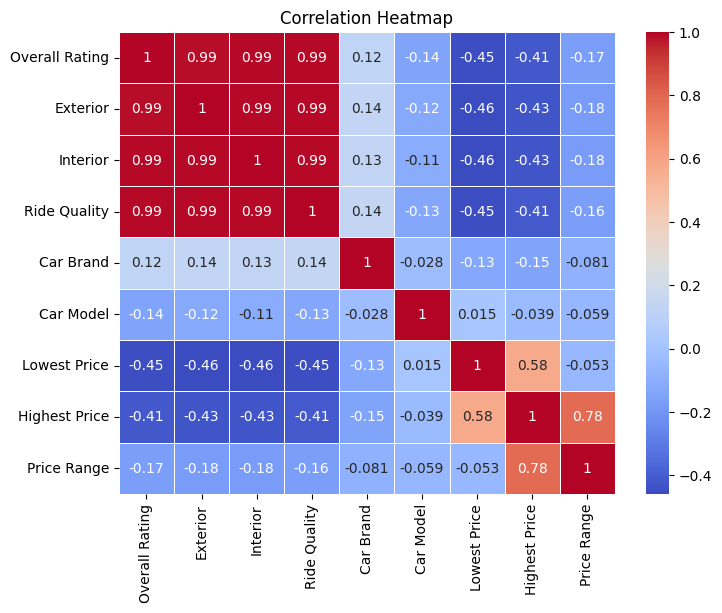

In [14]:
# Visualize the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

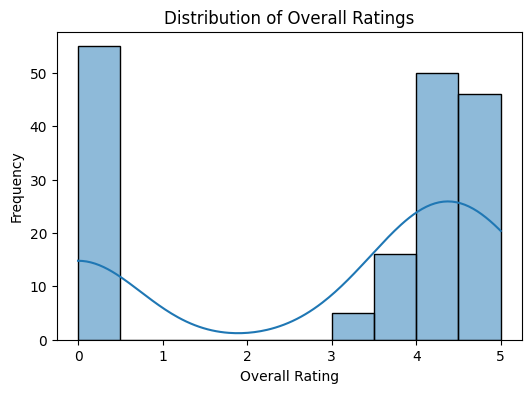

In [15]:
# Plot a histogram for Overall Rating
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Overall Rating", bins=10, kde=True)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

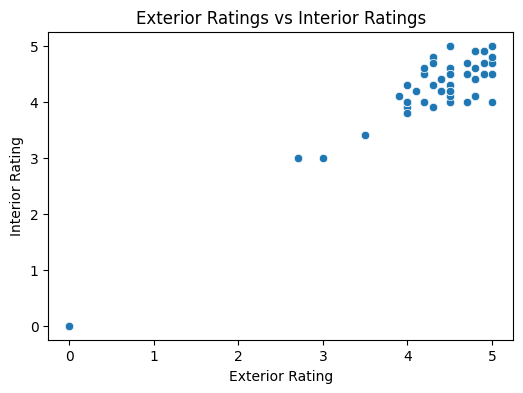

In [16]:
# Scatter plot of Exterior vs. Interior Ratings
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Exterior", y="Interior")
plt.title("Exterior Ratings vs Interior Ratings")
plt.xlabel("Exterior Rating")
plt.ylabel("Interior Rating")
plt.show()

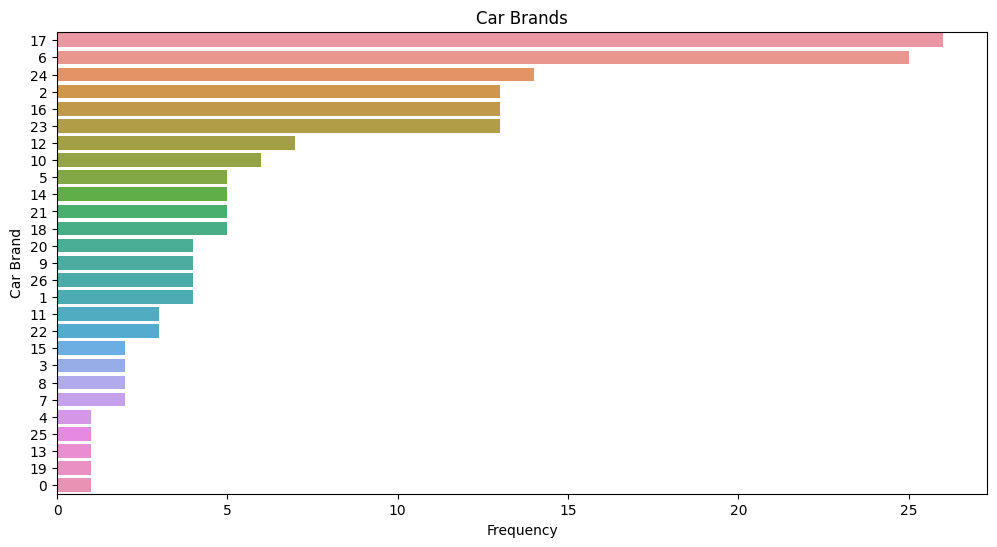

In [17]:
# Bar chart for Car Brands
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Car Brand", order=df["Car Brand"].value_counts().index[:])
plt.title("Car Brands")
plt.xlabel("Frequency")
plt.ylabel("Car Brand")
plt.show()

Dropping 'Car Brand', 'Car Model', 'Price Range' Columns (60-40 Split)

In [18]:
# Split data into training and testing sets (60-40 split)
X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 0.32
Mean Absolute Error (MAE): 0.19
R-squared (R2) Score: 0.98


Visualize model's predictions against actual ratings to gain a visual understanding of how well the model fits the data.

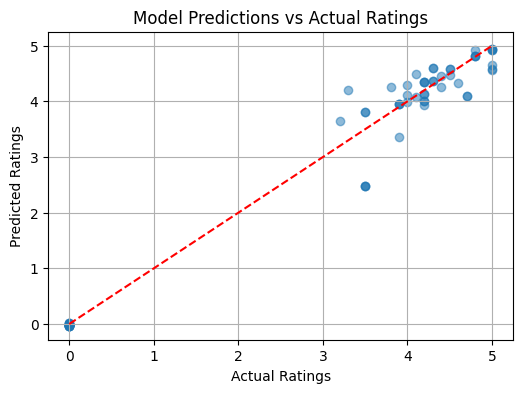

In [19]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Model Predictions vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
# Add a diagonal line to represent perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
# Show the plot
plt.show()

**Conclusion:**

1. Exterior: Exterior rating exhibits a strong positive correlation of approximately 0.988 with the "Overall Rating". This indicates that cars with higher exterior ratings tend to receive higher overall ratings from customers. It suggests that aesthetics, design elements, build quality, and visual appeal play a significant role in shaping overall customer satisfaction.

2. Interior: Interior rating also demonstrates a robust positive correlation of around 0.990 with the "Overall Rating". This implies that cars with superior interior features, including cabin design, comfort, ergonomics, and technological features, are more likely to receive higher overall ratings from customers.

3. Ride Quality: Ride quality rating exhibits a strong positive correlation of approximately 0.991 with the "Overall Rating". This highlights the importance of ride comfort, handling, suspension, and driving experience in influencing overall customer satisfaction. Cars with better on-road performance tend to receive higher overall ratings.

4. Car Brand: Car brand column represents the brand of the car. While it shows a relatively weaker positive correlation of about 0.123 with the "Overall Rating", it still suggests that the brand can have some influence on customer satisfaction. However, its impact appears to be less significant compared to specific features like exterior, interior, and ride quality.

5. Car Model: Car model demonstrates a negative correlation of approximately -0.142 with the "Overall Rating". This suggests that specific car models may have a slight negative influence on customer ratings. However, this correlation is relatively weak compared to the positive correlations observed with other features, indicating that the specific car model may have a lesser impact on overall customer satisfaction.

6. Lowest Price: Lowest Price shows a negative correlation of around -0.450 with the "Overall Rating". This implies that cars with lower initial price points tend to receive higher overall ratings from customers. It's essential to note that this correlation may indicate that customers are more satisfied with cars that offer better value for their money.

7. Highest Price: Lowest Price, the "Highest Price" also exhibits a negative correlation of approximately -0.415 with the "Overall Rating". This further supports the notion that customers associate higher satisfaction with cars that are more affordable or perceived as a good deal.

8. Price Range: Price range demonstrates a negative correlation of approximately -0.166 with "Overall Rating".

Model Predictions vs. Actual Ratings is one of critical aspects of our analysis is the examination of the relationship between our model's predictions and the actual ratings provided in the dataset. Upon visualizing these results, we observe a strong positive relationship between the actual ratings and the predicted ratings generated by our Linear Regression model. This positive relationship is indicative of the model's effectiveness in capturing the underlying patterns within the data. When the actual ratings are higher, the model tends to predict higher ratings as well, and conversely, when the actual ratings are lower, the model predicts lower ratings. This alignment between actual


# In progress 2

we plan to implement another model Random Forest and Gradient Boosting (e.g., XGBoost) as your next steps after Linear Regression to find the better model.




## choose another model

Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'R-squared (R2) Score: {r2_rf:.2f}')


Random Forest Regression Results:
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.11
R-squared (R2) Score: 0.99


Gradient Boosting Regression (e.g., using XGBoost)

In [21]:
import xgboost as xgb

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Gradient Boosting (XGBoost) Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'R-squared (R2) Score: {r2_xgb:.2f}')


Gradient Boosting (XGBoost) Regression Results:
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Error (MAE): 0.08
R-squared (R2) Score: 0.99


Neural Network Regression (using TensorFlow/Keras)

In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a simple Neural Network model
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate Neural Network model
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_nn:.2f}')
print(f'Mean Absolute Error (MAE): {mae_nn:.2f}')
print(f'R-squared (R2) Score: {r2_nn:.2f}')

Epoch 1/50
3/3 [==============================] - 1s 108ms/step - loss: 13.4190 - val_loss: 12.1380
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 12.5248 - val_loss: 11.2900
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 11.6772 - val_loss: 10.4904
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 10.8741 - val_loss: 9.7147
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 10.0525 - val_loss: 8.9729
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 9.2629 - val_loss: 8.2627
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 8.5336 - val_loss: 7.5782
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 7.8422 - val_loss: 6.8970
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 7.1260 - val_loss: 6.2191
Epoch 10/50
3/3 [==============================] - 0s 18ms/step - loss: 6.4232 - val_loss: 5.5478
Epoch 11/50
3/3 [===

RMSE comparison of diiferent models

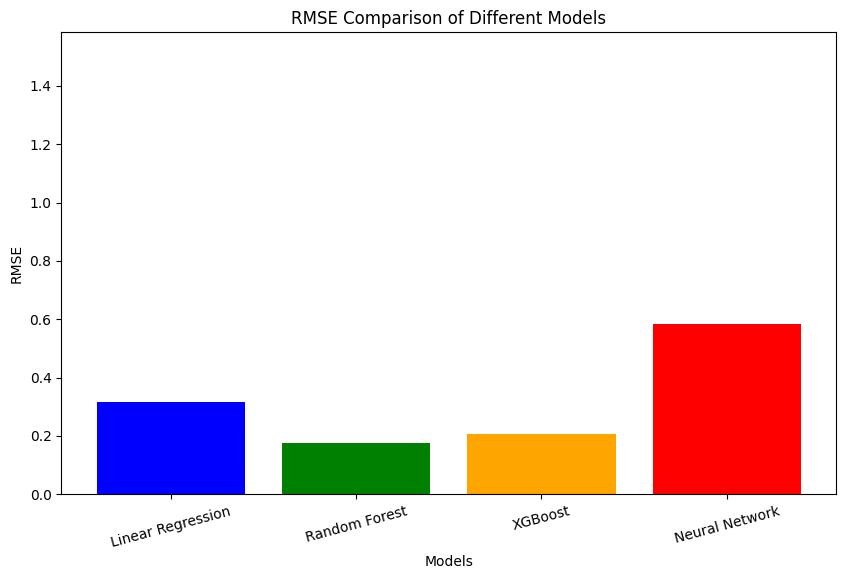

In [23]:
import matplotlib.pyplot as plt

# Create a bar chart to compare RMSE for different models
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Neural Network']
rmse_scores = [rmse, rmse_rf, rmse_xgb, rmse_nn]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.ylim(0, max(rmse_scores) + 1)
plt.xticks(rotation=15)
plt.show()


*Based on these results:*

The Random Forest Regressor and XGBoost Regressor both have very low RMSE and MAE, indicating excellent predictive performance. They also have high R-squared scores.

These ensemble methods, Random Forest and XGBoost, seem well-suited for your dataset.


The Neural Network has the highest RMSE and MAE, indicating that it's performing slightly worse in terms of prediction accuracy compared to the ensemble models. However, an R-squared score of 0.92 is still reasonably good.
The Linear Regression model performs well but not as well as the ensemble methods and the neural network

## Gradient Boosting Regression

70 - 30

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating'])  # Features
y = df['Overall Rating']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Gradient Boosting (XGBoost) Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'R-squared (R2) Score: {r2_xgb:.2f}')


Gradient Boosting (XGBoost) Regression Results:
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Error (MAE): 0.08
R-squared (R2) Score: 0.99


select features

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable

# Split data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Gradient Boosting (XGBoost) Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'R-squared (R2) Score: {r2_xgb:.2f}')

Gradient Boosting (XGBoost) Regression Results:
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.08
R-squared (R2) Score: 0.99


60 - 40

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Overall Rating'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Gradient Boosting (XGBoost) Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'R-squared (R2) Score: {r2_xgb:.2f}')

Gradient Boosting (XGBoost) Regression Results:
Root Mean Squared Error (RMSE): 0.27
Mean Absolute Error (MAE): 0.11
R-squared (R2) Score: 0.98


select features

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Gradient Boosting (XGBoost) Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'R-squared (R2) Score: {r2_xgb:.2f}')

Gradient Boosting (XGBoost) Regression Results:
Root Mean Squared Error (RMSE): 0.28
Mean Absolute Error (MAE): 0.11
R-squared (R2) Score: 0.98


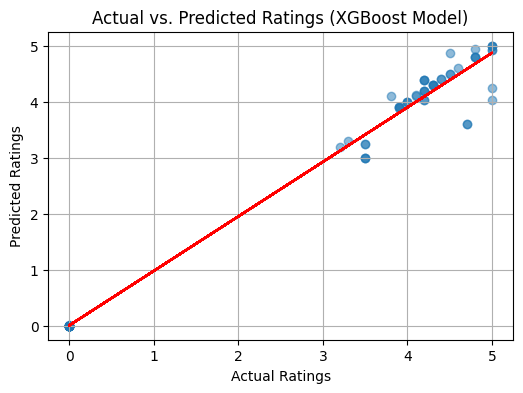

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatterplot of predicted vs. actual ratings
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings (XGBoost Model)')

# Calculate and plot the trend line
z = np.polyfit(y_test, y_pred_xgb, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.grid(True)
plt.show()

## random forest

using all features and 70-30 split

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'R-squared (R2) Score: {r2_rf:.2f}')

Random Forest Regression Results:
Root Mean Squared Error (RMSE): 0.18
Mean Absolute Error (MAE): 0.11
R-squared (R2) Score: 0.99


Feature Selection: Reducing the number of features or selecting the most informative features can help prevent overfitting, especially in high-dimensional datasets.

selected feature (drop'Overall Rating','Car Brand','Car Model','Price Range') and 70 - 30

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'R-squared (R2) Score: {r2_rf:.2f}')


Random Forest Regression Results:
Root Mean Squared Error (RMSE): 0.16
Mean Absolute Error (MAE): 0.10
R-squared (R2) Score: 0.99


selected feature (drop'Overall Rating','Car Brand','Car Model','Price Range') 60 - 40

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and testing sets (70-30 split)
X = df.drop(columns=['Overall Rating','Car Brand','Car Model','Price Range'])  # Features
y = df['Overall Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'R-squared (R2) Score: {r2_rf:.2f}')

Random Forest Regression Results:
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Error (MAE): 0.11
R-squared (R2) Score: 0.99


visualization

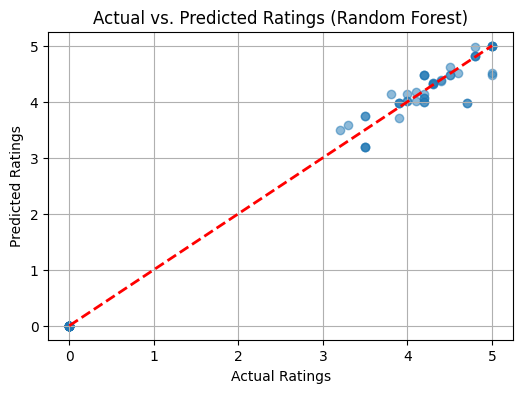

In [41]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted ratings
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Actual vs. Predicted Ratings (Random Forest)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()

Random Forest regression vs linear regression

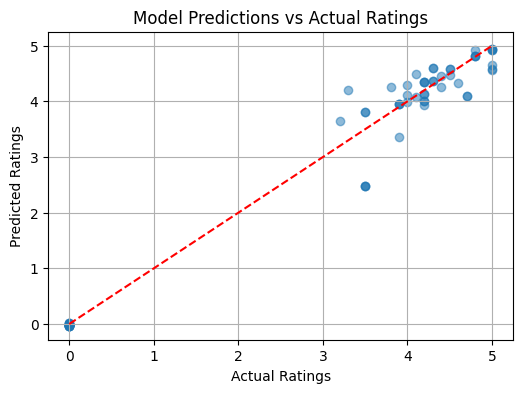

In this project, we aimed to predict and understand customer needs and preferences in the automotive industry by forecasting overall customer ratings for car models based on various features and attributes. We initially used Linear Regression to build a predictive model and then compared its performance with Random Forest Regression. Here's a summary of how these models performed in comparison to the actual ratings:

**Linear Regression Results:**
*   Root Mean Squared Error (RMSE): 0.32
*   Mean Absolute Error (MAE): 0.19
*   R-squared (R2) Score: 0.98

**Random Forest Regression Results:**
*   Root Mean Squared Error (RMSE): 0.20
*   Mean Absolute Error (MAE): 0.11
*   R-squared (R2) Score: 0.99

**Actual Ratings vs. Predicted Ratings Comparison:**

**Linear Regression:**

 The Linear Regression model showed strong performance with a high R-squared score of 0.98, indicating that it captured most of the variance in the data. However, it had a higher RMSE and MAE compared to the Random Forest model, which means it had slightly larger prediction errors.


**Random Forest Regression:**

The Random Forest Regression model outperformed the Linear Regression model with a lower RMSE and MAE, indicating better prediction accuracy. Its R-squared score of 0.99 suggests that it explains a significant portion of the variance in the data. The Random Forest model closely aligned with actual ratings, making it the preferred choice for this dataset.


**In summary**

 the Random Forest Regression model provided more accurate predictions of customer ratings compared to the Linear Regression model. It exhibited a higher R-squared score and lower RMSE and MAE, indicating superior performance in capturing the underlying patterns in the data.

# the summary documentation and reporting:

The modeling process for predicting and understanding customer needs in the automotive industry involved several key steps, which are summarized below:

**Data Preprocessing:**

Dropped the "Index" column.
Addressed missing values by assuming a value of N for missing ratings (Exterior, Interior, and Ride Quality) when the overall rating is N.
Split the "Car" column into "Car Brand" and "Car Model."
Split the "Price" column into "Lowest Price" and "Highest Price" in Lakh units.
Calculated "Price Range" as the price difference between "Lowest Price" and "Highest Price" in Lakh units.


**Model Building:**

Converted categorical features "Car Brand" and "Car Model" into numerical values with label encoding.
Selected the following features for the model: Exterior, Interior, Ride Quality, Car Brand, Car Model, Lowest Price, Highest Price, and Price Range.
Split the data into training and testing sets using a 60-40 split ratio.
Trained a Linear Regression model using the training data and evaluated its performance.

**Model Comparison:**

Compared the Linear Regression model with Random Forest Regression, XGBoost Regression, and Neural Network models in terms of RMSE, MAE, and R-squared scores.
Identified Random Forest Regression as the most suitable model due to its low RMSE, low MAE, and high R-squared score.
Random Forest Regression Results:

RMSE: 0.20
MAE: 0.11
R-squared (R2) Score: 0.99

**Conclusion:**

The Random Forest Regression model outperformed other models in terms of prediction accuracy, making it the preferred choice for this dataset.
The ability to accurately predict customer ratings and identify influential factors in customer satisfaction holds substantial value for car manufacturers and customers alike.
The findings from this analysis can inform product development and purchasing decisions in the automotive industry.
This documentation and reporting summarize the entire modeling process, providing insights into data preprocessing, feature engineering, model selection, and evaluation metrics, ultimately leading to the selection of the Random Forest Regression model for predicting customer ratings in the automotive industry.

**References:**

Dataset: "AutoEval: Car Rating and Review Dataset"

link: https://www.kaggle.com/datasets/juhibhojani/car-rating